<a href="https://colab.research.google.com/github/Basifrank/HNG12_Codes/blob/main/HNG12_STAGE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/HNG INTERNSHIP/HNG 12/Stage 2/marketing_campaign_dataset.xlsx')

# Overview of Data

In [ ]:
dataset.shape

(200005, 15)

In [ ]:
dataset.dtypes

,0
Campaign_ID,int64
Company,object
Campaign_Type,object
Target_Audience,object
Duration,object
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,int64
ROI,float64
Location,object


In [ ]:
dataset.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [ ]:
# change Campaign_ID column to object dtype

dataset['Campaign_ID'] = dataset['Campaign_ID'].astype(str)


In [ ]:
dataset.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


In [ ]:
dataset["Campaign_Type"].unique(), dataset["Location"].unique()

(array(['Email', 'Influencer', 'Display', 'Search', 'Social Media'],
       dtype=object),
 array(['Chicago', 'New York', 'Los Angeles', 'Miami', 'Houston'],
       dtype=object))

In [ ]:
# calculating % Click_Through_Rate

dataset["Click_Through_Rate_%"] = round((dataset["Clicks"] / dataset["Impressions"]) * 100, 2)


In [ ]:
# calculating Cost_Per_Click

dataset["Cost_Per_Click"] = round(dataset["Acquisition_Cost"] / dataset["Clicks"],2)

In [ ]:
# converting data column to datetime datatype

dataset["Date"] = pd.to_datetime(dataset["Date"])

In [ ]:
dataset.describe()

,Conversion_Rate,Acquisition_Cost,ROI,Date,Clicks,Impressions,Engagement_Score,Click_Through_Rate_%,Cost_Per_Click
count,200005.000000,200005.000000,200005.000000,200005,200005.000000,200005.000000,200005.000000,200005.000000,200005.00000
mean,0.080069,12504.441794,5.002416,2021-07-01 23:37:44.289392896,549.774591,5507.307107,5.494673,14.040501,32.00832
min,0.010000,5000.000000,2.000000,2021-01-01 00:00:00,100.000000,1000.000000,1.000000,1.010000,5.02000
25%,0.050000,8740.000000,3.500000,2021-04-02 00:00:00,325.000000,3266.000000,3.000000,5.860000,15.09000
50%,0.080000,12497.000000,5.010000,2021-07-02 00:00:00,550.000000,5518.000000,5.000000,9.980000,22.77000
75%,0.120000,16264.000000,6.510000,2021-10-01 00:00:00,775.000000,7753.000000,8.000000,16.970000,38.60000
max,0.150000,20000.000000,8.000000,2021-12-31 00:00:00,1000.000000,10000.000000,10.000000,99.200000,199.96000
std,0.040602,4337.663210,1.734485,NaN,260.019354,2596.863794,2.872593,13.087977,26.92584


In [ ]:
dataset.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Click_Through_Rate_%', 'Cost_Per_Click'],
      dtype='object')

# Visualizations

### Campaign Type vs Relevant KPIs

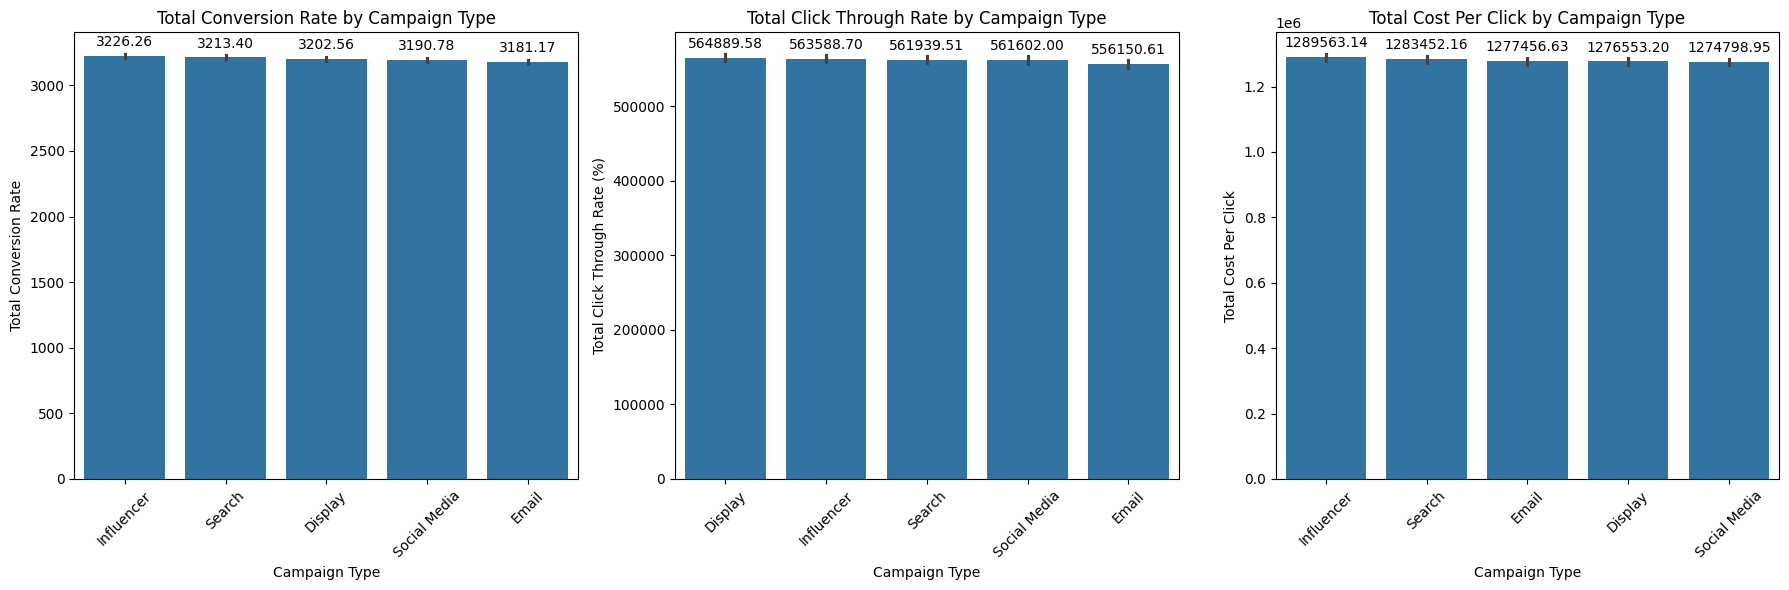

In [ ]:
def plot_campaign_metrics(dataset):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Helper function to create the bar plot with descending order
    def create_barplot(ax, x_col, y_col, title, ylabel):
        order = dataset.groupby(x_col)[y_col].sum().sort_values(ascending=False).index
        sns.barplot(ax=ax, x=x_col, y=y_col, data=dataset, estimator=sum, order=order)
        ax.set_title(title)
        ax.set_xlabel('Campaign Type')
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Conversion Rate
    create_barplot(axes[0], "Campaign_Type", "Conversion_Rate", 'Total Conversion Rate by Campaign Type', 'Total Conversion Rate')

    # CTR
    create_barplot(axes[1], "Campaign_Type", "Click_Through_Rate_%", 'Total Click Through Rate by Campaign Type', 'Total Click Through Rate (%)')

    # CPC
    create_barplot(axes[2], "Campaign_Type", "Cost_Per_Click", 'Total Cost Per Click by Campaign Type', 'Total Cost Per Click')

    plt.tight_layout()
    plt.savefig('campaign_type_kpi.png')
    plt.show()

plot_campaign_metrics(dataset)


In [ ]:
dataset.columns


Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Click_Through_Rate_%', 'Cost_Per_Click'],
      dtype='object')

### Trend Analysis of relevant KPIs

In [ ]:
# convert dataframe column to series (name is used to label the data) Cost_Per_Click
dataset_CPC_ts = pd.Series(dataset.Cost_Per_Click.values, index=dataset.Date,
name='Cost_Per_Click')
dataset_CPC_ts.head()

,Cost_Per_Click
Date,
2021-01-01,31.96
2021-02-01,99.71
2021-03-01,17.47
2021-04-01,58.64
2021-05-01,43.41


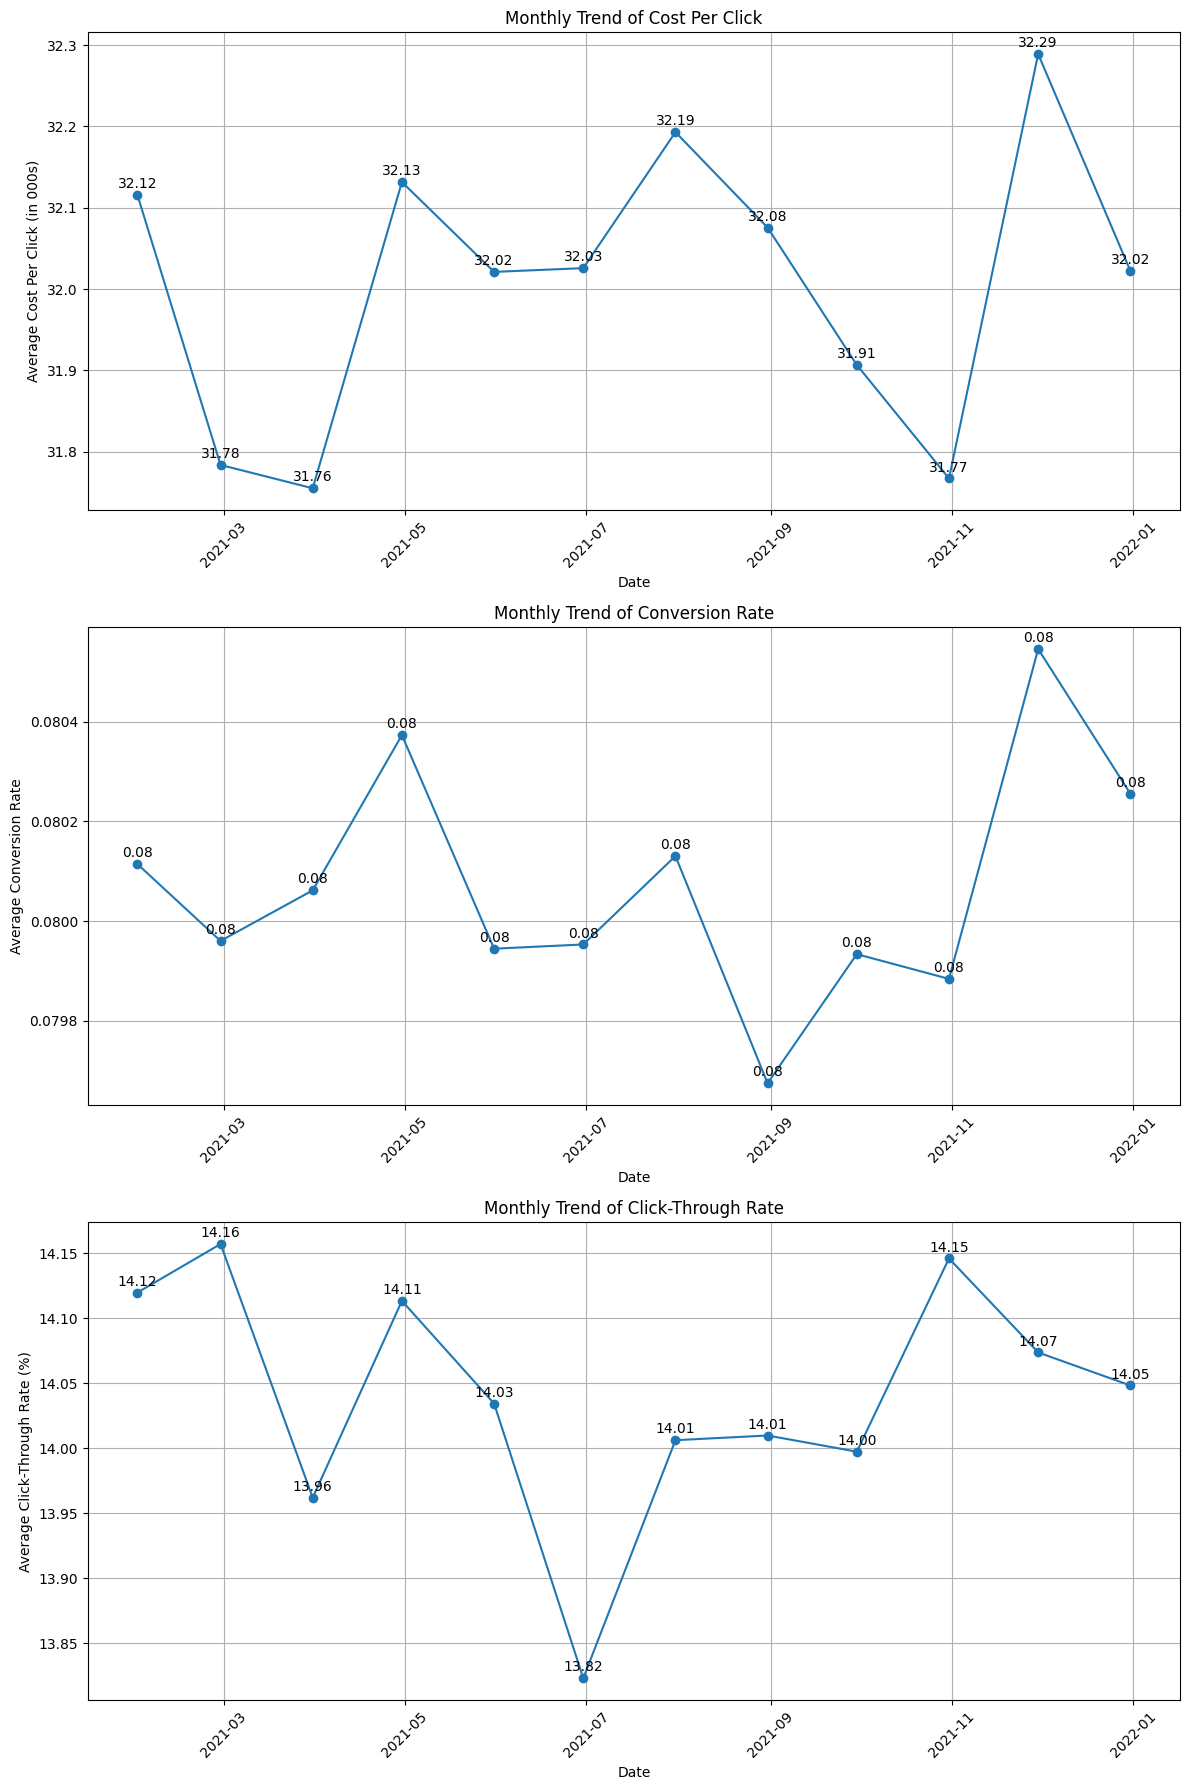

In [ ]:
# Create the subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: CPC Trend
monthly_cpc = dataset_CPC_ts.resample('M').mean()
axes[0].plot(monthly_cpc.index, monthly_cpc.values, marker='o', linestyle='-')
for i, v in enumerate(monthly_cpc.values):
    axes[0].annotate(f'{v:.2f}', (monthly_cpc.index[i], v), textcoords="offset points", xytext=(0,5), ha='center')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Cost Per Click (in 000s)')
axes[0].set_title('Monthly Trend of Cost Per Click')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)


# Plot 2: Conversion Rate Trend
dataset_conversion_ts = pd.Series(dataset['Conversion_Rate'].values, index=dataset.Date, name='Conversion_Rate')
monthly_conversion = dataset_conversion_ts.resample('M').mean()
axes[1].plot(monthly_conversion.index, monthly_conversion.values, marker='o', linestyle='-')
for i, v in enumerate(monthly_conversion.values):
    axes[1].annotate(f'{v:.2f}', (monthly_conversion.index[i], v), textcoords="offset points", xytext=(0,5), ha='center')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Conversion Rate')
axes[1].set_title('Monthly Trend of Conversion Rate')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)


# Plot 3: Click-Through Rate Trend
dataset_ctr_ts = pd.Series(dataset['Click_Through_Rate_%'].values, index=dataset.Date, name='Click_Through_Rate_%')
monthly_ctr = dataset_ctr_ts.resample('M').mean()
axes[2].plot(monthly_ctr.index, monthly_ctr.values, marker='o', linestyle='-')
for i, v in enumerate(monthly_ctr.values):
    axes[2].annotate(f'{v:.2f}', (monthly_ctr.index[i], v), textcoords="offset points", xytext=(0,5), ha='center')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Average Click-Through Rate (%)')
axes[2].set_title('Monthly Trend of Click-Through Rate')
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Trend_Analysis.png')
plt.show()


### Distribution of relevant categorical columns

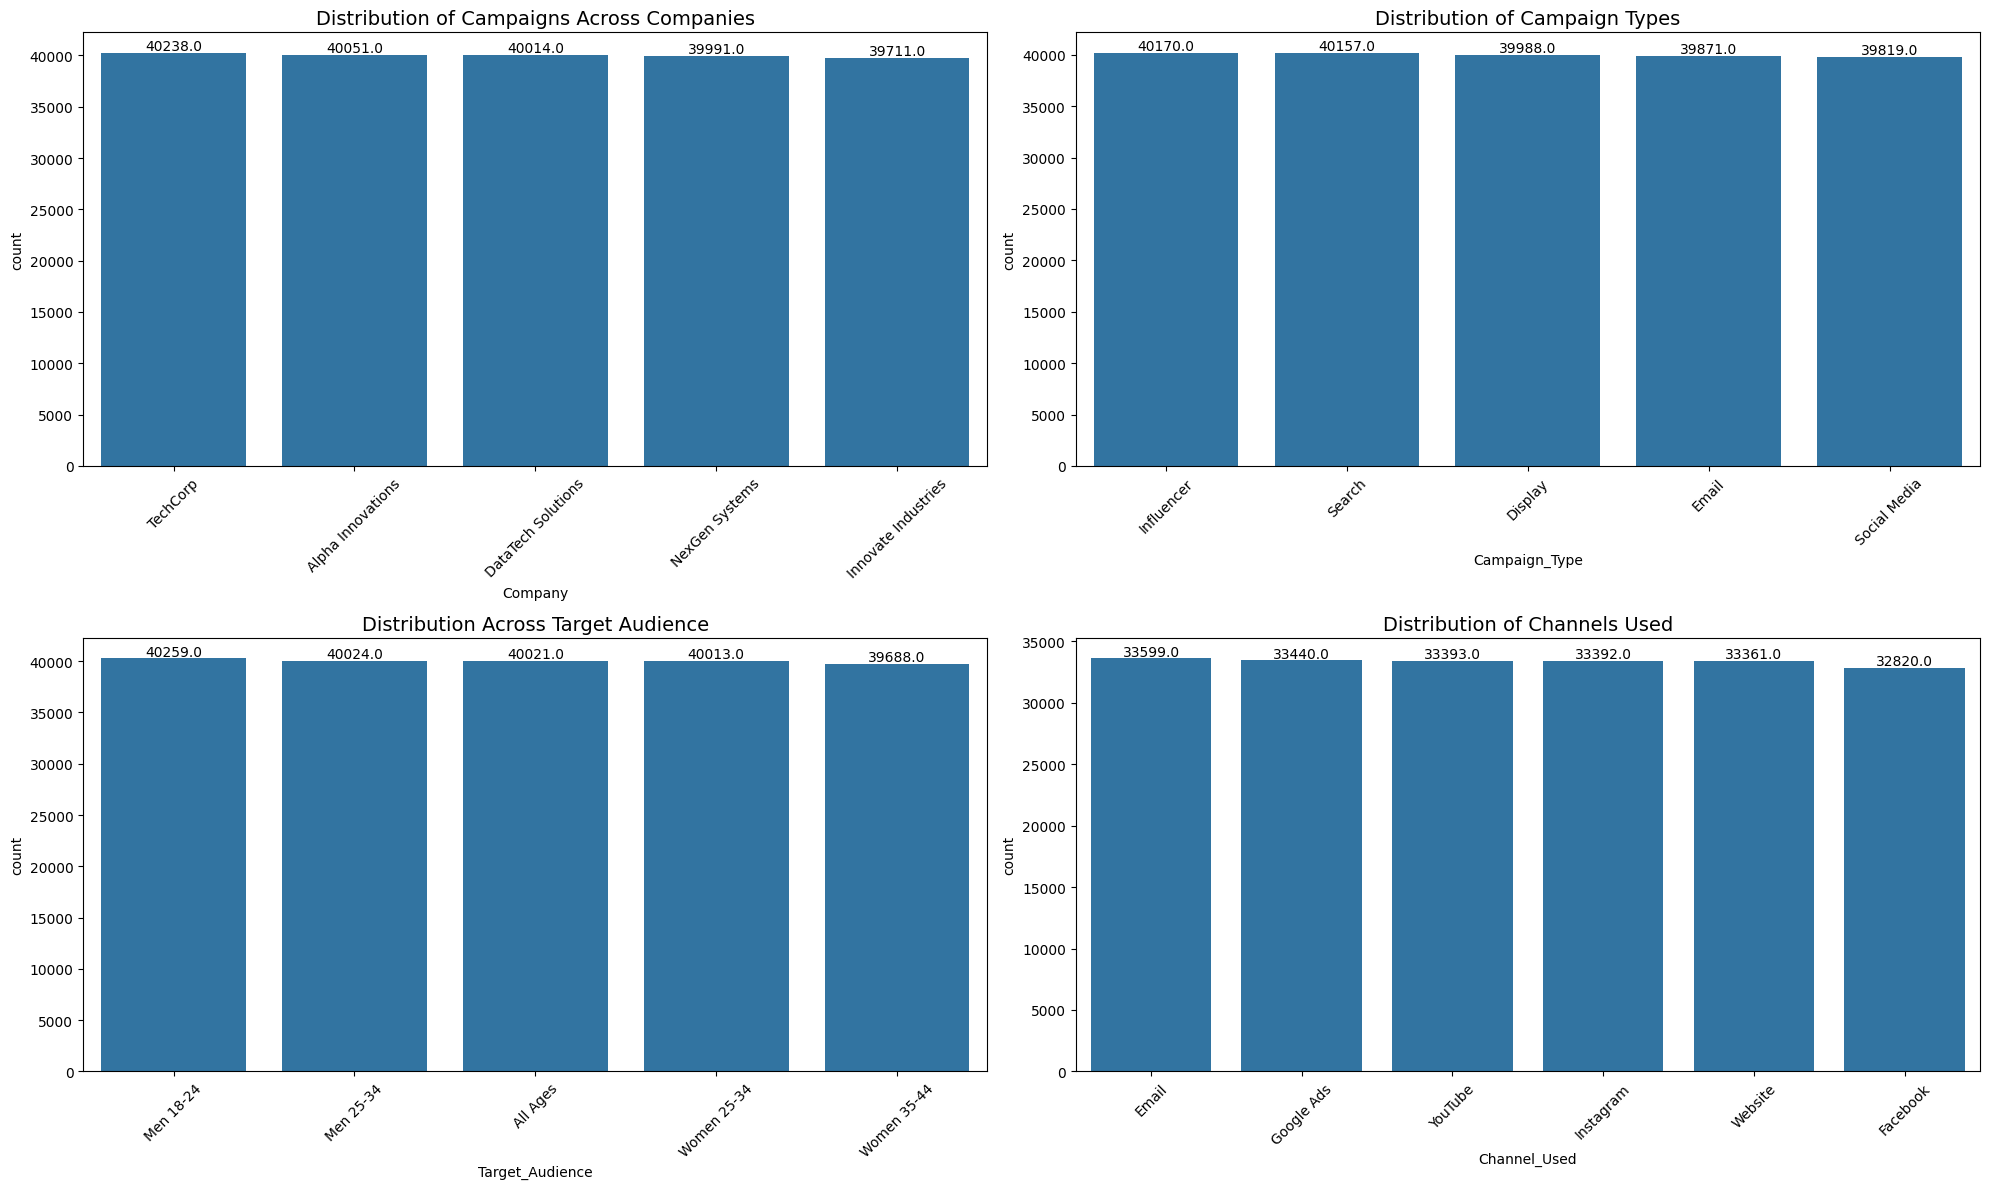

In [ ]:
# Create subplots for visualizations
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
default_color = sns.color_palette()[0]

def create_countplot(ax, data, x_col, title):
    order = data[x_col].value_counts().index
    sns.countplot(data=data, x=x_col, color=default_color, order=order, ax=ax)
    ax.set_title(title, fontsize=14) #Added title
    ax.tick_params(axis='x', rotation=45) #Added xticks rotation
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')


create_countplot(axs[0, 0], dataset, 'Company', 'Distribution of Campaigns Across Companies')
create_countplot(axs[0, 1], dataset, 'Campaign_Type', 'Distribution of Campaign Types')
create_countplot(axs[1, 0], dataset, 'Target_Audience', 'Distribution Across Target Audience')
create_countplot(axs[1, 1], dataset, 'Channel_Used', 'Distribution of Channels Used')


plt.tight_layout()
plt.savefig('Dist_of_cat_Col.png')
plt.show()


In [ ]:
dataset.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Click_Through_Rate_%', 'Cost_Per_Click'],
      dtype='object')

### Cost Per Click Relationship with Clicks, Click Through Rate and Acquisition Cost

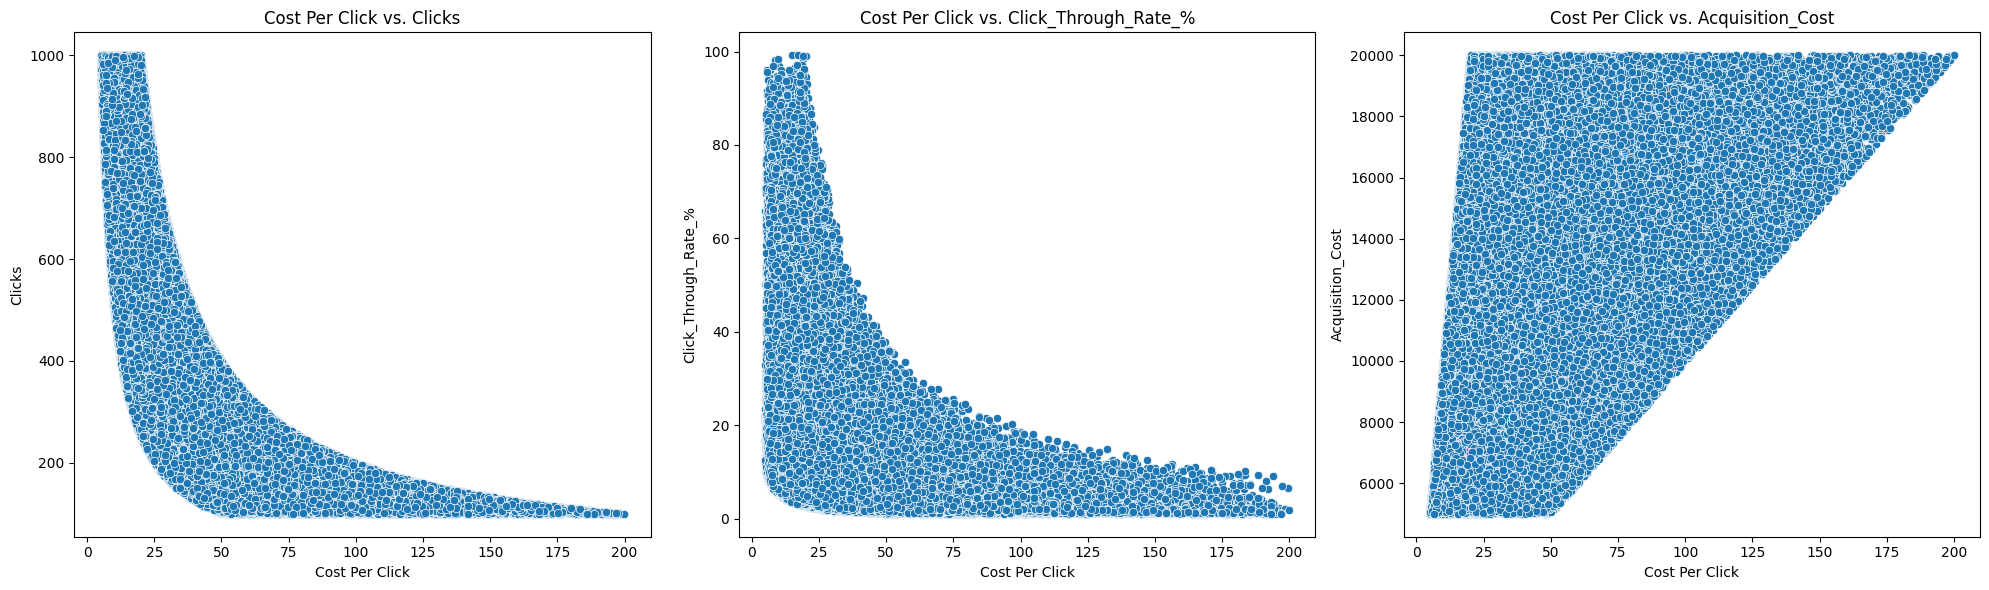

In [ ]:

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1
sns.scatterplot(x='Cost_Per_Click', y='Clicks', data=dataset, ax=axes[0])
axes[0].set_title('Cost Per Click vs. Clicks')
axes[0].set_xlabel('Cost Per Click')
axes[0].set_ylabel('Clicks')

# Plot 2
sns.scatterplot(x='Cost_Per_Click', y='Click_Through_Rate_%', data=dataset, ax=axes[1])
axes[1].set_title('Cost Per Click vs. Click_Through_Rate_%')
axes[1].set_xlabel('Cost Per Click')
axes[1].set_ylabel('Click_Through_Rate_%')

# Plot 3
sns.scatterplot(x='Cost_Per_Click', y='Acquisition_Cost', data=dataset, ax=axes[2])
axes[2].set_title('Cost Per Click vs. Acquisition_Cost')
axes[2].set_xlabel('Cost Per Click')
axes[2].set_ylabel('Acquisition_Cost')

plt.tight_layout()
plt.savefig('Cost_per_click.png')
plt.show()


In [ ]:
 !sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
# converting to pdf

#!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert "/content/drive/MyDrive/HNG INTERNSHIP/HNG 12/Stage 2/HNG12_STAGE2.ipynb" --to pdf


[NbConvertApp] Converting notebook /content/drive/MyDrive/HNG INTERNSHIP/HNG 12/Stage 2/HNG12_STAGE2.ipynb to pdf
[NbConvertApp] Support files will be in HNG12_STAGE2_files/
[NbConvertApp] Making directory ./HNG12_STAGE2_files
[NbConvertApp] Writing 63556 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 821310 bytes to /content/drive/MyDrive/HNG INTERNSHIP/HNG 12/Stage 2/HNG12_STAGE2.pdf
